In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/train.csv', header=0)

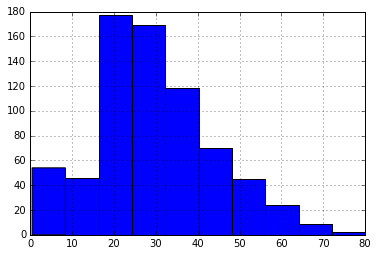

In [3]:
import pylab as P
df['Age'].hist()
P.show()

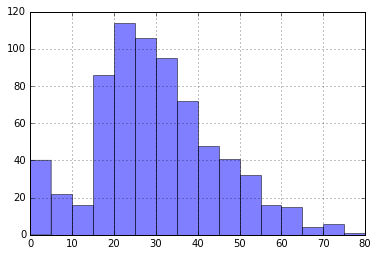

In [4]:
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

In [5]:
df[~df['Age'].isnull()]['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
df['Age'].mean()

29.69911764705882

In [7]:
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [8]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


## Cleaning the Data

> Ok now that we are comfortable with the syntax, we are ready to begin transforming the values in the dataframe into the shape we need for machine learning. First of all, it's hard to run analysis on the string values of "male" and "female". Let's practice transforming it in three ways -- twice for fun and once to make it useful. We'll store our transformation in a new column, so the original Sex isn't changed.

In [9]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


> Can you make a new column to do something similar for the Embarked values?

In [11]:
df[['Embarked']].describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [12]:
embarked_dict = dict(((y,x) for x,y  in enumerate('SCQ', start=1)))
df['EmbarkedValue'] = df['Embarked'].map(lambda x: embarked_dict.get(x, -1)).astype(int)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,EmbarkedValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


> Now it's time to deal with the missing values of Age, because most machine learning will need a complete set of values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of Age might still make a better model than before.  We know the average [known] age of all passengers is 29.6991176 -- we could fill in the null values with that. But maybe the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The Age histogram did seem positively skewed. These are the kind of decisions you make as you create your models in a Kaggle competition.

The tutorial suggests creating an empty array and populating it with median ages for Gender and Pclass. 

```
median_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
 
```

However, Pandas can perform this using `groupby`, and there's no need to drop NaNs.

In [20]:
df['AgeFill'] = df['Age']

In [21]:
dfgrp = df.groupby(['Gender', 'Pclass'])

df['AgeFill'] = dfgrp['AgeFill'].transform(lambda x: x.fillna(x.median()))

In [25]:
dfgrp['Age'].median()

Gender  Pclass
0       1         35.0
        2         28.0
        3         21.5
1       1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [27]:
# See where null ages have been filled with class/gender based median ages
df[df['Age'].isnull()][['Age', 'AgeFill', 'Gender', 'Pclass']].head(10)

,Age,AgeFill,Gender,Pclass
5,NaN,25.0,1,3
17,NaN,30.0,1,2
19,NaN,21.5,0,3
26,NaN,25.0,1,3
28,NaN,21.5,0,3
29,NaN,25.0,1,3
31,NaN,35.0,0,1
32,NaN,21.5,0,3
36,NaN,25.0,1,3
42,NaN,25.0,1,3


In [28]:
df[['Age', 'AgeFill', 'Gender', 'Pclass']].head(10)

,Age,AgeFill,Gender,Pclass
0,22.0,22.0,1,3
1,38.0,38.0,0,1
2,26.0,26.0,0,3
3,35.0,35.0,0,1
4,35.0,35.0,1,3
5,NaN,25.0,1,3
6,54.0,54.0,1,1
7,2.0,2.0,1,3
8,27.0,27.0,0,3
9,14.0,14.0,0,2


> Let's also create a feature that records whether the Age was originally missing. This is relatively simple by allowing pandas to use the integer conversion of the True/False evaluation of its built-in function, pandas.isnull()

Huh, okay

In [30]:
df['AgeIsNull'] = df.Age.isnull()

In [31]:
df.describe()

/Users/dcloud/.virtualenvs/snake-oil/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,EmbarkedValue,AgeFill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.356902,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.645211,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.420000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,1.000000,21.500000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,1.000000,26.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,2.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,80.000000


## Feature Engineering

> Let's create a couple of other features, this time using simple math on existing columns. Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize: